#Importazione librerie e df

In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score #E' la nuova metrica
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv('iris.data', header=None)

In [42]:
df.columns = ['sepal lenght', 'sepal width', 'petal lenght', 'petal width', 'class']

In [43]:
df

,sepal lenght,sepal width,petal lenght,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#Label encoding

###metodo map

In [44]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [45]:
df['class']= df['class'].map({'Iris-setosa':0, 'Iris-versicolor':1,'Iris-virginica':2 }) #la colonna class è uguale a: 
df

,sepal lenght,sepal width,petal lenght,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#1. EDA

Siamo davanti ad un problema di **classificazione bianaria**, il rischio è o risk 1 oppure risk 0.

In [46]:
pd.unique(df['class'])

array([0, 1, 2])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal lenght  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal lenght  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [48]:
# getting the statistical measures of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal lenght,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal lenght,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5
class,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


##Bilanciamento del dataset

Controllo che per ogni classe io abbia una percentuale più o meno simile

In [49]:
df['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

##SEABORN

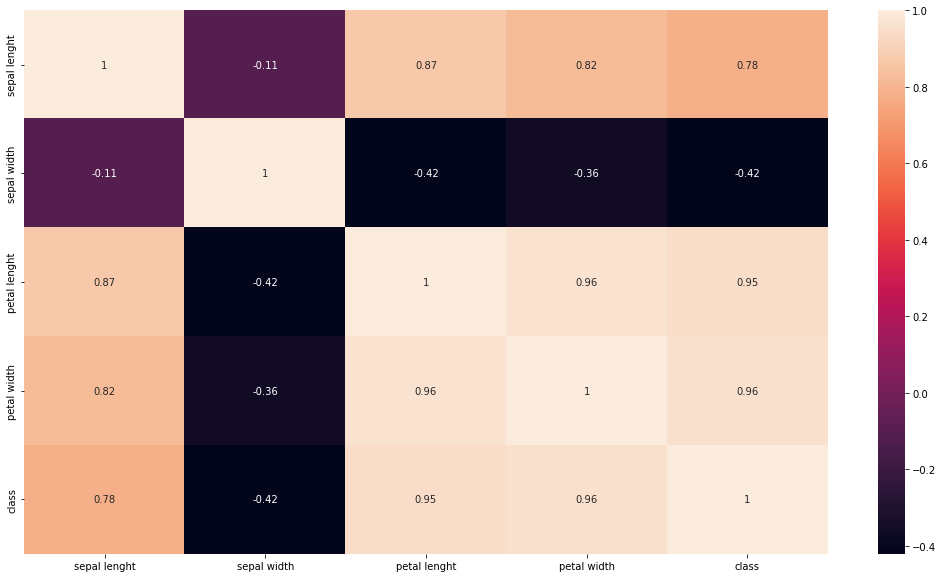

In [50]:
import seaborn as sns

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

In [51]:
#sns.pairplot(df, hue='Risk')

##Separo data e labels

In [52]:
# separating the data and labels
X_ = df.drop(['class'], axis=1)
y = df['class']

#2. Standardizzazione (opzionale)

In [53]:
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)
print(standardized_data)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [54]:
X = standardized_data
y = df['class']

In [55]:
print(X)
print(y)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

#3. Train Test Split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

In [57]:
print(X.shape, X_train.shape, X_test.shape)


(150, 4) (120, 4) (30, 4)


###RandomForest

In [58]:
X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(X_,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

In [59]:
print(X.shape, X_trainRF.shape, X_testRF.shape)

(150, 4) (120, 4) (30, 4)


###KNN

In [60]:
X_trainKNN, X_testKNN, y_trainKNN, y_testKNN = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

###Decision Tree

In [61]:
X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split(X_,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

#4. Dichiaro il classificatore/modello

###LogisticRegression

In [62]:
classifierL = LogisticRegression()

###RandomForest

In [63]:
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier()


###KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier()


##Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier()

#5. FIT

##LogisticRegression

In [66]:
classifierL.fit(X_train, y_train)

LogisticRegression()

##RandomForest

In [67]:
classifierRF.fit(X_trainRF, y_trainRF)

RandomForestClassifier()

##KNN

In [68]:
classifierKNN.fit(X_trainKNN, y_trainKNN)

KNeighborsClassifier()

##Decision Tree

In [69]:
classifierDT.fit(X_trainDT, y_trainDT)

DecisionTreeClassifier()

#6. EVALUATION (Verifica dell'accuracy del modello)

##LogisticRegression

In [70]:
# accuracy score on the test data
y_pred = classifierL.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

In [71]:
print('Accuracy score of the test data : ', test_data_accuracy)


Accuracy score of the test data :  0.9666666666666667


##RandomForest

In [72]:
# accuracy score on the test data
y_predRF = classifierRF.predict(X_testRF)
test_data_accuracyRF = accuracy_score(y_predRF, y_testRF)

In [73]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9666666666666667


##KNN

In [74]:
# accuracy score on the test data
y_predKNN = classifierKNN.predict(X_testKNN)
test_data_accuracyKNN = accuracy_score(y_predKNN, y_testKNN)

In [75]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9666666666666667


##Decision Tree

In [76]:
# accuracy score on the test data
y_predDT = classifierDT.predict(X_testDT)
test_data_accuracyDT = accuracy_score(y_predDT, y_testDT)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9666666666666667


#7. CONFUSION MATRIX

##Step 1: Definire le labels

In [83]:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

##Step 2: Importare ConfusionMatrixDisplay

###LogisticRegression

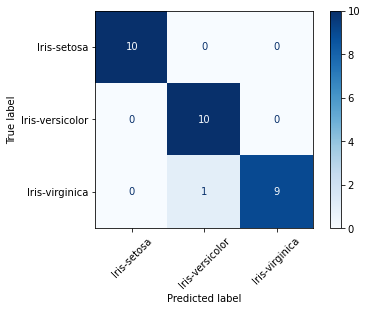

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay


cm = ConfusionMatrixDisplay.from_estimator(classifierL, 
                                      X_test, 
                                      y_test,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

###RandomForest

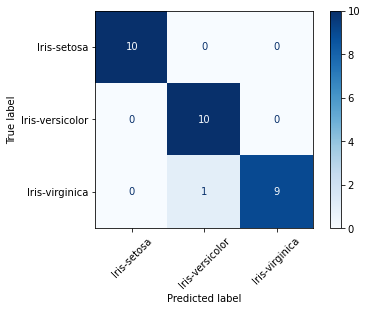

In [85]:
from sklearn.metrics import ConfusionMatrixDisplay


cm = ConfusionMatrixDisplay.from_estimator(classifierRF, 
                                      X_testRF, 
                                      y_testRF,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

Sensitivity e specificity è uguale ad 1. Non c'è stata misclassification

###KNN

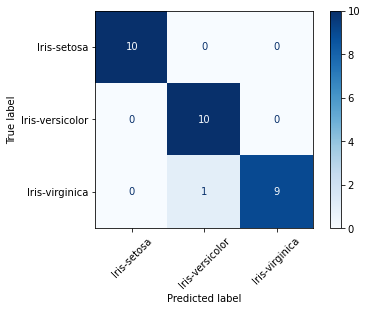

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay


cm = ConfusionMatrixDisplay.from_estimator(classifierKNN, 
                                      X_testKNN, 
                                      y_testKNN,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

###Decision Tree

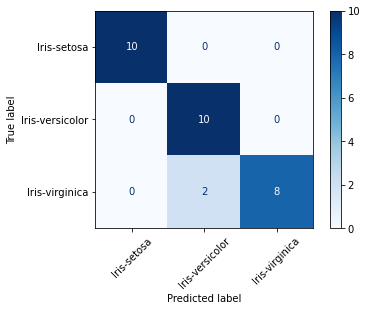

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay


cm = ConfusionMatrixDisplay.from_estimator(classifierDT, 
                                      X_testDT, 
                                      y_testDT,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

#8. CLASSIFICATION REPORT per F1 Score

###LogisticRegression

In [88]:
from sklearn.metrics import classification_report
#labels = ['No Risk', 'Risk']
print(classification_report(y_test, y_pred, target_names=labels))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



F1 è la media armonica della precision e recall. Quando viene calcolata, è calcolata per una classe e poi per l'altra, quando le va a calcolare sono pesate per classi. 

Support: y_test è 155 righe, di cui 64 classe 1, e 91 classe 0 (o contrario)

###RandomForest

In [89]:
from sklearn.metrics import classification_report
#labels = ['No Risk', 'Risk']
print(classification_report(y_testRF, y_predRF, target_names=labels))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



##KNN

In [90]:
from sklearn.metrics import classification_report
#labels = ['No Risk', 'Risk']
print(classification_report(y_testKNN, y_predKNN, target_names=labels))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



##Decision Tree

In [91]:
from sklearn.metrics import classification_report
#labels = ['No Risk', 'Risk']
print(classification_report(y_testDT, y_predDT, target_names=labels))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



#10. PIPELINE

#Array compatibile con prediction

#File .pckl

Ogni volta che voglio riutilizzare il modello devo sempre fare la standardization se non è una pipeline

#11. Utilizzo il modello

In [ ]:
input_data = [3.89,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4]

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

La lista di input deve avere lo stesso numero delle features!!


##Devo sempre fare il reshape

Per far si che l'array possa essere trasformato devo fare il reshape perché standar scaler vuole così 

if prediction[0]==0  print (no risk) perché ho salvato risk/no risk con i numeri invece che con le stringhe

In [ ]:

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [ ]:


# standardize the input data
std_data = sc.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction[0])

if (prediction[0] == 0):
  print('No risk')
else:
  print('Risk')